
## Introduction

Clustering is the task of __dividing the population__ or __data points__ into _a number of groups_ such that _data points in the same groups are more similar to other data points in the same group_ than those in other groups. 
> __In simple words, the aim is to segregate groups with similar traits and assign them into clusters__. 

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression
- Behavioral Segmentation
- Inventory Categorization
- Sorting Sensor measurements
- Detecting bots and anomalies
- Computer Vision
- Astronomy



## Mathematical Interpretation of K-Means Clustering
K-Means clustering aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean. The algorithm works iteratively to minimize the within-cluster variance, mathematically expressed as:
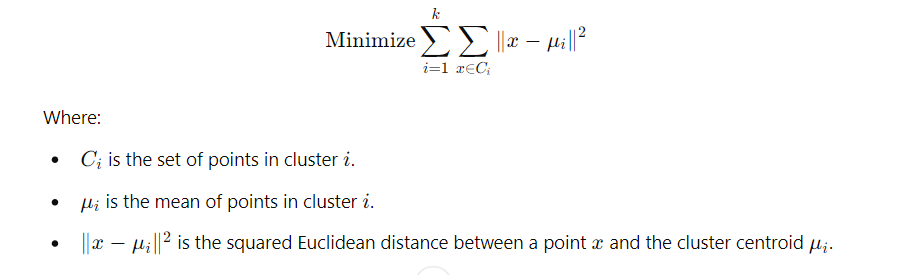

## Step by Step Implementation

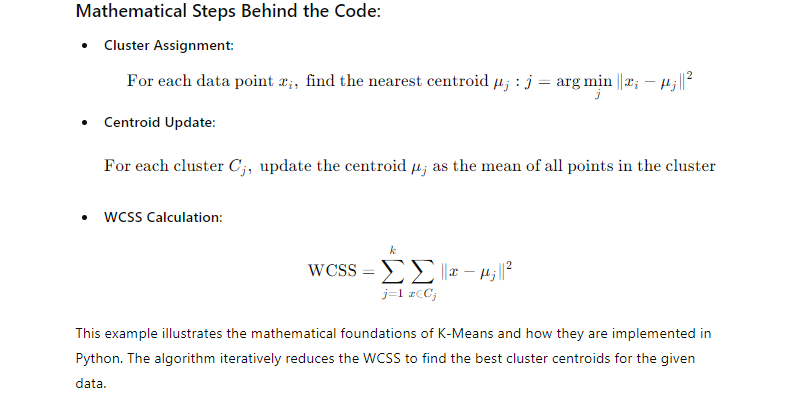

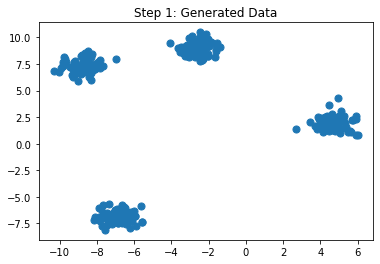

In [2]:
###Step 1: Generate Synthetic Data
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Visualize the data points
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Step 1: Generated Data")
plt.show()


### Insight
- scatter plot of the generated data points with no labels or centroids yet. 
- The points are randomly distributed around four cluster centers.

In [3]:
## Step 2: Initialize the K-Means Model and Step 3: Fit the Model to the Data
from sklearn.cluster import KMeans

# Initialize the K-Means model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(X)


KMeans(n_clusters=4, random_state=42)

- it runs the K-Means algorithm to find the best cluster centroids.

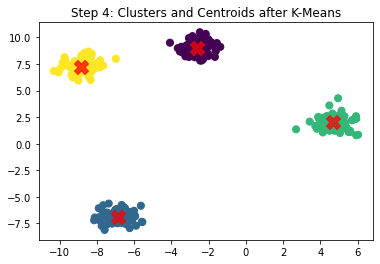

In [4]:
#Step 4: Extract the Centroids and Labels
# Extract the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters with their centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Step 4: Clusters and Centroids after K-Means")
plt.show()


- A scatter plot with data points colored according to their assigned cluster. 
- Red 'X' markers indicate the centroids of each cluster.

### Visualizing the Iterative Process of K-Means

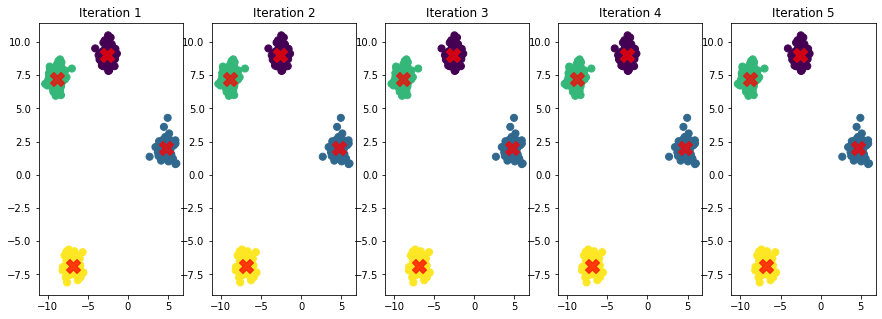

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Initialize KMeans model with random initialization
kmeans = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1, random_state=42)

# Initialize plot
plt.figure(figsize=(15, 5))

# Run iterative fitting
for i in range(1, 6):  # First 5 iterations
    kmeans.fit(X)  # Perform one iteration of KMeans
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Plot current iteration
    plt.subplot(1, 5, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(f"Iteration {i}")

plt.show()


- This visualization shows the positions of the centroids after each iteration of K-Means. 
- You will see how the centroids move closer to the center of their respective clusters over time.

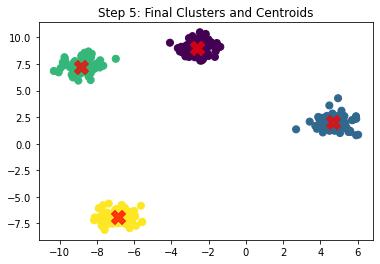

In [7]:
## Step 5: Visualize the Final Clusters and Centroids
# Final Clustering Output
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Step 5: Final Clusters and Centroids")
plt.show()


- The final scatter plot shows the well-defined clusters with their respective centroids, marking the end of the K-Means clustering process.

In [9]:
## Step 6: Calculate the Within-Cluster Sum of Squares (WCSS)
# Calculate the Within-Cluster Sum of Squares (WCSS)
wcss = sum(np.min(np.linalg.norm(X - centroids[labels], axis=1))**2 for i in range(X.shape[0]))

print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.2f}")


Within-Cluster Sum of Squares (WCSS): 0.19


- This step calculates and prints the WCSS, which quantifies how tightly the clusters are packed.

### Significance of Within-Cluster Sum of Squares (WCSS)

Within-Cluster Sum of Squares (WCSS) is a measure used to evaluate the compactness of clusters formed by a clustering algorithm like K-Means. It quantifies how tightly the data points in each cluster are packed around their centroid.

**Mathematical Definition**:
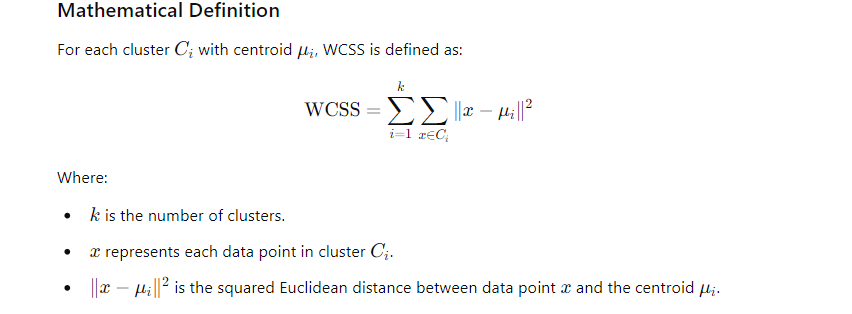

#### Significance of WCSS:

- Compactness: Lower WCSS indicates that the clusters are more compact, meaning data points within each cluster are closer to their centroid.
- Cluster Quality: It helps in assessing the quality of the clustering. Lower WCSS values suggest better clustering with well-defined clusters.
- Choosing K: WCSS is used to determine the optimal number of clusters (K). The "Elbow Method" uses WCSS to identify the optimal K by plotting WCSS against the number of clusters and looking for a point where the decrease in WCSS slows down (the "elbow").

### Code to Calculate and Plot WCSS

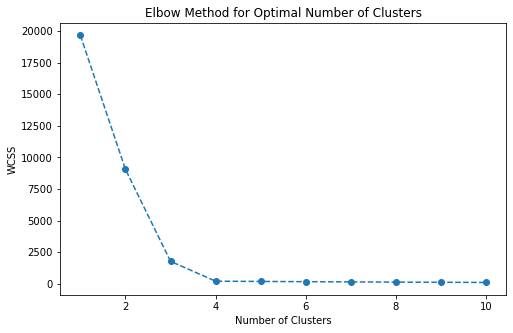

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Compute WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the WCSS to find the Elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### Interpreting the Elbow Plot
- Initial Decrease: As the number of clusters increases, WCSS decreases because clusters become smaller and more compact.
- Elbow Point: The point where the rate of decrease sharply slows down is the "elbow" of the curve. This point indicates a good balance between the number of clusters and the compactness of the clusters.